In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import astropy.io.fits as fits
#from astropy import units as u
#from astropy import constants as const

In [82]:
path = "../../../6x2pt_Roman_SO/growth_parameters/"
f_cosmosis = np.loadtxt(path+"f_z.txt")
D_cosmosis = np.loadtxt(path+"d_z.txt")
z_cosmosis = np.loadtxt(path+"z.txt")
a_cosmosis = np.loadtxt(path+"a.txt")

In [83]:
# implemeting f = Omega_m(a)^gamma(a)
#a = np.logspace(-2, 0, 1000)
z = np.arange(0, 7+0.02, 0.02)
#a = np.linspace(0.2,1, 10000)
a =  1/(1+z)
#a = a[::-1] 
#a = np.logspace(-1,0, 1000)
omegam0 = 0.3156
omegal0 = 1- omegam0
Hsquare = omegam0 * a**(-3) + omegal0
omegam = omegam0 * a**(-3) /(Hsquare)
gamma = 0.55


f = omegam**gamma
#what is this normalization? I am not so sure


In [65]:
f[0]

0.5303045422157139

Text(0.5, 0, 'a')

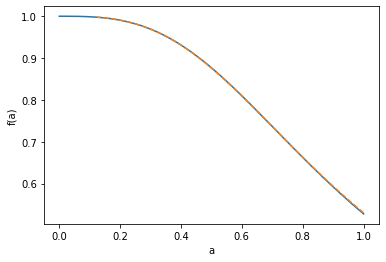

In [84]:
plt.plot(a_cosmosis, f_cosmosis)
plt.plot(a, f, "--")
plt.ylabel("f(a)")
plt.xlabel("a")

$$D(a) = exp(\int_0^a dlna [f(a) -1])$$

In [85]:
# calculating the integral to D
#starting integral at early time in matter dominated era, for now 10^-4
loga = np.log(a)

import scipy.integrate as integrate

#D = [np.exp(integrate.trapz(f[:i], loga[:i])) for i in range(len(loga))]
#D = [np.exp(-integrate.trapz(  (f[i:]), loga[i:])) for i in range(len(loga))]


#D = [np.exp(-integrate.trapz(  (f[i:]), loga[i:])) for i in range(len(loga))]
#D = np.exp(integrate.cumtrapz(f[::-1], loga[::-1], initial=0.))
D = np.exp(integrate.cumtrapz(f, loga, initial=0.))

#D = np.exp(integrate.cumtrapz(f, loga, initial=0.))

#D = D[::-1]

def growthf(loga):
    a = np.exp(loga)
    omegam0 = 0.3156
    omegal0 = 1.- omegam0
    Hsquare = omegam0 * a**(-3) + omegal0
    omegam = omegam0 * a**(-3) /(Hsquare)
    gamma = 0.55
    return omegam**gamma
    #return np.exp ( loga + np.log(omegam**gamma))  https://scicomp.stackexchange.com/questions/20901/integral-in-log-log-space


#D = [np.exp(-1*integrate.quad(  growthf, loga[i], 0)[0] ) for i in range(len(loga))]


D = 5.*(omegam0)/2. * D #


#D = D[::-1]
D

array([0.789     , 0.78066591, 0.7724025 , 0.76421303, 0.7561005 ,
       0.74806762, 0.74011686, 0.73225043, 0.72447027, 0.71677814,
       0.70917553, 0.70166373, 0.69424385, 0.68691677, 0.67968323,
       0.67254376, 0.66549875, 0.65854844, 0.65169292, 0.64493215,
       0.63826597, 0.63169411, 0.62521619, 0.61883172, 0.61254015,
       0.60634084, 0.60023305, 0.594216  , 0.58828885, 0.5824507 ,
       0.57670058, 0.57103752, 0.56546047, 0.55996837, 0.55456013,
       0.54923463, 0.54399074, 0.53882728, 0.5337431 , 0.52873701,
       0.52380782, 0.51895435, 0.51417539, 0.50946975, 0.50483623,
       0.50027364, 0.49578079, 0.49135651, 0.48699961, 0.48270894,
       0.47848334, 0.47432167, 0.4702228 , 0.46618562, 0.46220901,
       0.4582919 , 0.45443319, 0.45063185, 0.44688682, 0.44319707,
       0.43956158, 0.43597938, 0.43244947, 0.42897089, 0.42554269,
       0.42216395, 0.41883375, 0.41555119, 0.4123154 , 0.4091255 ,
       0.40598066, 0.40288003, 0.3998228 , 0.39680818, 0.39383

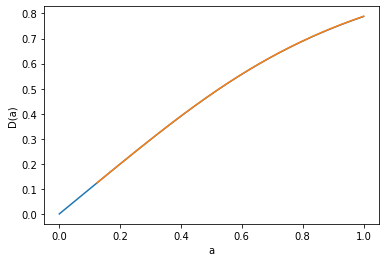

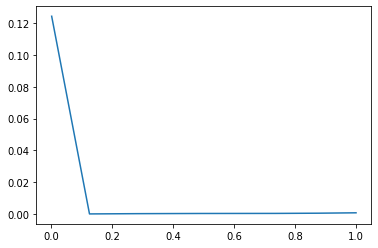

In [86]:
#plt.figure(figsize=(10,10))
plt.plot(a_cosmosis, D_cosmosis)
#plt.plot(a, np.array(D)/7.4, "--")
plt.plot(a, np.array(D))#*0.79)


plt.xlabel("a")
plt.ylabel("D(a)")

plt.figure()
#plt.plot(a_cosmosis, (np.interp(a_cosmosis, a, np.array(D))-D_cosmosis))
plt.plot(a_cosmosis, (np.interp(a_cosmosis[::-1], a[::-1], np.array(D)[::-1])[::-1]-D_cosmosis))




In [7]:
# scales with lower limit -> something is wrong but I am not sure what

In [8]:
5.*omegam0/2.

0.7889999999999999

In [9]:
%time [np.exp(-1*integrate.quad(  growthf, loga[i], 0)[0] ) for i in range(len(loga))]

CPU times: user 670 ms, sys: 12.1 ms, total: 682 ms
Wall time: 692 ms


,
 0.01205581001967945,
 0.012182713150482185,
 0.012309616275703454,
 0.012436519395226383,
 0.012563422508932854,
 0.012690325616703616,
 0.012817228718418089,
 0.012944131813954577,
 0.013071034903190157,
 0.013197937986000623,
 0.013324841062260692,
 0.0134517441318437,
 0.01357864719462195,
 0.013705550250466391,
 0.013832453299246835,
 0.013959356340831865,
 0.014086259375088839,
 0.01421316240188393,
 0.01434006542108209,
 0.01446696843254705,
 0.014593871436141331,
 0.01472077443172625,
 0.014847677419161941,
 0.014974580398307255,
 0.015101483369019892,
 0.015228386331156312,
 0.015355289284571801,
 0.01548219222912038,
 0.01560909516465489,
 0.015735998091026965,
 0.015862901008087044,
 0.015989803915684272,
 0.016116706813666684,
 0.016243609701881045,
 0.016370512580172948,
 0.016497415448386746,
 0.016624318306365557,
 0.016751221153951334,
 0.01687812399098482,
 0.017005026817305518,
 0.017131929632751734,
 0.01725883243716054,
 0.017385735230367835,
 0.017512638012208297

In [10]:
%time [np.exp(-integrate.trapz(  (f[i:]), loga[i:])) for i in range(len(loga))]

CPU times: user 281 ms, sys: 5.48 ms, total: 286 ms
Wall time: 291 ms


50421,
 0.0119289069346043,
 0.012055810071406643,
 0.012182713202742966,
 0.01230961632849761,
 0.012436519448553672,
 0.012563422562793084,
 0.012690325671096516,
 0.012817228773343453,
 0.012944131869412168,
 0.013071034959179759,
 0.013197938042522008,
 0.01332484111931362,
 0.01345174418942796,
 0.013578647252737297,
 0.013705550309112614,
 0.013832453358423683,
 0.013959356400539134,
 0.014086259435326301,
 0.01421316246265136,
 0.014340065482379257,
 0.01446696849437372,
 0.01459387149849727,
 0.01472077449461126,
 0.014847677482575759,
 0.014974580462249663,
 0.015101483433490676,
 0.015228386396155248,
 0.015355289350098646,
 0.01548219229517492,
 0.0156090952312369,
 0.015735998158136217,
 0.01586290107572328,
 0.015989803983847282,
 0.01611670688235627,
 0.01624360977109695,
 0.01637051264991496,
 0.016497415518654603,
 0.016624318377159084,
 0.016751221225270268,
 0.01687812406282894,
 0.017005026889674604,
 0.01713192970564555,
 0.017258832510578873,
 0.017385735304310476,

In [282]:
%time np.exp(integrate.cumtrapz(f[::-1], loga[::-1], initial=0.))

CPU times: user 1.07 ms, sys: 867 µs, total: 1.93 ms
Wall time: 1.01 ms


array([1.00000000e+00, 9.99946960e-01, 9.99893912e-01, ...,
       2.53806614e-04, 1.26903307e-04,            nan])

In [ ]:
## wow doing it all at once is a lot faster